In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal
from sympy import *

In [101]:
def conv(n,pmf1=None,X1=None):
    f = lambda x,a,b : 1/(b-a)*(a<x)*(x<b)

    if pmf1 is None :
        a,b,c,d = 0,1,0,1
        delta = 2*(b+d)/n
        big_grid = np.arange(-b-d,b+d,delta)
        f1 = f(big_grid,0,1)
        f2 = f(big_grid,0,1)
        pmf1 = f1*delta
        pmf2 = f2*delta
        conv_pmf = signal.fftconvolve(pmf1,pmf2,'same')
        print("Sum of convoluted pmf: "+str(sum(conv_pmf)))
        pdf1 = pmf1/delta
        pdf2 = pmf2/delta
        conv_pdf = conv_pmf/delta
        print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, big_grid)))
        plt.plot(big_grid,pdf1, label='pdf')
        plt.plot(big_grid,pdf2, label='$U(0,1)$')
        plt.plot(big_grid,conv_pdf, label='convoluted')
        plt.legend(loc='best'), plt.suptitle('Convolution')
        plt.show()
        return(conv_pdf)
    
    if pmf1 is not None :
        a,b,c,d = min(X1),max(X1),0,1 # Support of new pdf and U(0,1)
        new_delta = 2*(b+d)/n
        old_delta = 2*b/n
        new_big_grid = np.arange(-b-d,b+d,new_delta)
        old_big_grid = np.arange(-b,b,old_delta)
        f2 = f(old_big_grid,c,d)
        pmf1 = pmf1*old_delta
        pmf2 = f2*old_delta # Default : pdf of U(0,1)
        conv_pmf = signal.fftconvolve(pmf1,pmf2,'same')
        print("Sum of convoluted pmf: "+str(sum(conv_pmf)))
        pdf1 = pmf1/old_delta
        pdf2 = pmf2/old_delta
        conv_pdf = conv_pmf/new_delta
        print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, new_big_grid)))
        plt.plot(old_big_grid, pdf1, label='pdf')
        plt.plot(old_big_grid, pdf2, label='$U(0,1)$')
        plt.plot(old_big_grid, conv_pdf, label='convoluted')
        plt.legend(loc='best'), plt.suptitle('Convolution')
        plt.show()
        return(conv_pdf)

Sum of convoluted pmf: 1.0
Integration of convoluted pdf: 0.9999920000000009


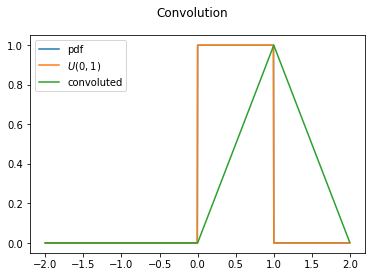

Sum of convoluted pmf: 0.8313280000000006
Integration of convoluted pdf: 0.8303160639999699


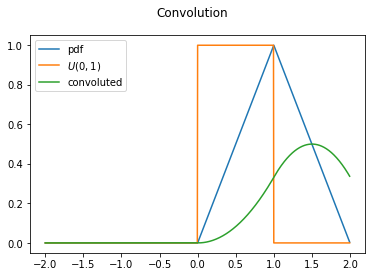

Sum of convoluted pmf: 0.6089356273920002
Integration of convoluted pdf: 0.6075632828160008


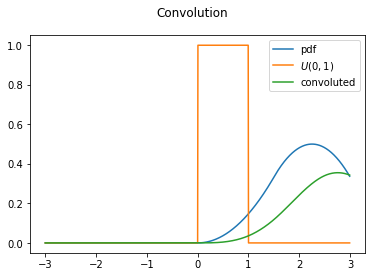

Sum of convoluted pmf: 0.4334347426191361
Integration of convoluted pdf: 0.4320730243906471


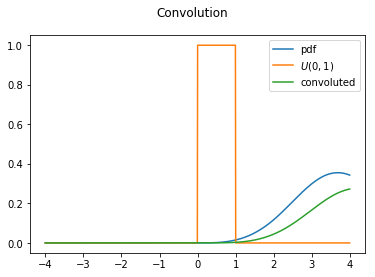

In [102]:
h1 = conv(10**3)
h2 = conv(10**3,h1,[0,2])
h3 = conv(10**3,h2,[0,3])
h3 = conv(10**3,h3,[0,4])